На этот раз ситуация следующая: вы работаете в приложении по доставке готовых продуктов. К вам пришел коллега с результатами двух тестов:

В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый
Коллега пришел к вам с просьбой: он посмотрел на графики и предположил, что среди групп могут встретиться различия. Ваша задача – помочь ему проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

Задания:
1. Выберите метод, который предположительно подойдет в первом вопросе.
2. Проверьте, являются ли дисперсии внутри групп гомогенными.
3. Проведите тест на нормальность распределения.
4. Сравните средние в представленных группах.
5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 
6. Примите решение: какие картинки в итоге будем использовать?
7. Выберите метод для второго теста.
8. Визуализируйте распределение events для контрольной и тестовой групп. 
9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 
10 - 11. Выберите формулу для модели, проведите тест.

Описание данных
5_task_1:

id – id клиента в эксперименте

group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)

events – сколько блюд суммарно было заказано за период

5_task_2:

id – id клиента в эксперименте

segment – сегмент (high/low)

group – вид кнопки (control – старая версия, test – новая версия)

events – сколько блюд суммарно было заказано за период

In [1]:
# required libraries
import pandas as pd
import numpy as np
from scipy import stats
import requests
from urllib.parse import urlencode
import datetime
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
pip install pingouin

  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196210 sha256=5afcc2336a2b55493571debfc059fc888aa8c258c4f0e1c9cfb1571a3e7d080d
  Stored in directory: c:\users\grebe\appdata\local\pip\cache\wheels\c0\9f\92\4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e63b802d5a2605928703632ced2427951c455e39c57c6df991f6f64f3b0f2b92
  Stored in directory: c:\users\grebe\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use upda

In [2]:
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import pingouin as pg

#from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

In [3]:
import statistics

In [2]:
# import таблица с уникальными идентификаторами пользователей from Yandex.cloud
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Lj5WClBbCt3fyw'  # Сюда вписываете вашу ссылку
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
df1=pd.read_csv(download_url)

In [4]:
# import таблица с уникальными идентификаторами пользователей from Yandex.cloud
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Vnlvg9uOrMVKhw'  # Сюда вписываете вашу ссылку
# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [5]:
df2=pd.read_csv(download_url)

In [9]:
df1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   group   30000 non-null  object
 2   events  30000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

Hint: scipy.stats.levene либо pingouin.homoscedasticity

In [17]:
ss.levene(df1.query('group=="A"').events.to_list(),\
          df1.query('group=="B"').events.to_list(),\
          df1.query('group=="C"').events.to_list())

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

Answer: Дисперсии внутри групп примерно одинаковые (гомогенные homoscedasticity)

Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

Дополнительно: попробуйте посчитать тест Шапиро-Уилка без использования метода sample. Сравните  результат с normaltest, а также qq-графиками. Какой вывод можно сделать по совокупности этих методов?

Выберите верные утверждения:

Все утверждения не верны

Распределение events в группе A является нормальным

Распределение events в группе B является нормальным

Распределение events в группе С является нормальным

In [19]:
ss.shapiro(df1[df1['group'] == 'A']['events'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [25]:
ss.shapiro(df1[df1['group'] == 'A']['events'])

C:\Users\grebe\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)

In [26]:
ss.normaltest(df1[df1['group'] == 'A']['events'].sample(1000, random_state=17))

NormaltestResult(statistic=0.6421907772748111, pvalue=0.7253540571548922)

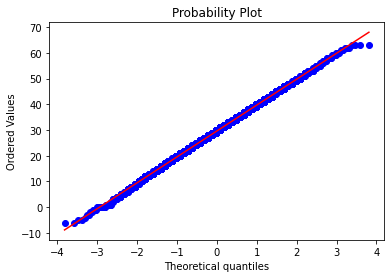

In [34]:
ss.probplot(df1[df1['group'] == 'A']['events'], dist="norm", plot=plt)
plt.show()

In [22]:
ss.shapiro(df1[df1['group'] == 'B']['events'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [23]:
ss.shapiro(df1[df1['group'] == 'C']['events'].sample(1000, random_state=17))

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

Answer: All distributions are normal ones.

In [36]:
A=df1.query('group=="A"').events.to_list()
B=df1.query('group=="B"').events.to_list()
C=df1.query('group=="C"').events.to_list()

Однофакторный Дисперсионный Анализ

In [37]:
ss.f_oneway(A,B,C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [41]:
statistics.mean(A)

29.5796

In [42]:
statistics.mean(B)

37.6136

In [43]:
statistics.mean(C)

27.4703

Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

Дополнительно: попробуйте другие варианты поправок на множественные сравнения через pingouin. Дают ли они те же выводы, что и Тьюки?

In [44]:
print(pairwise_tukeyhsd(df1.events, df1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [45]:
pg.pairwise_tukey(data=df1, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

Какой метод скорее всего пригодится в данном случае?

In [46]:
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [47]:
df2.nunique()

id         100000
group           2
segment         2
events         97
dtype: int64

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  int64  
 1   group    100000 non-null  object 
 2   segment  100000 non-null  object 
 3   events   100000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ MB


<AxesSubplot:xlabel='events', ylabel='count'>

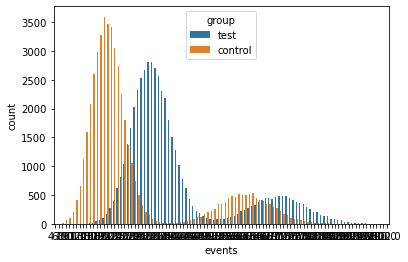

In [52]:
sns.countplot(data=df2, x='events', hue='group')

C:\Users\grebe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

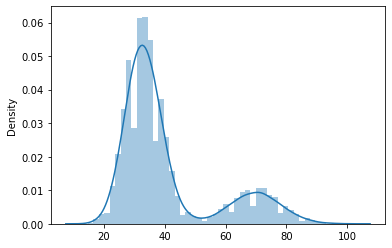

In [54]:
sns.distplot(x=df2.query('group=="test"').events)

C:\Users\grebe\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

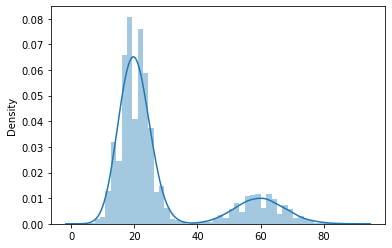

In [55]:
sns.distplot(x=df2.query('group=="control"').events)

Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

В качестве ответа укажите стандартное отклонение для пользователей из сегмента high и контрольной группы, с точностью до 2 знаков после точки.

In [10]:
round(df2.groupby(['group', 'segment']).events.describe(),2)

count   mean   std   min   25%   50%   75%    max
group   segment                                                     
control high     10000.0  59.97  7.81  31.0  55.0  60.0  65.0   89.0
        low      40000.0  20.03  4.47   4.0  17.0  20.0  23.0   41.0
test    high     10000.0  69.94  8.40  40.0  64.0  70.0  76.0  102.0
        low      40000.0  33.03  5.72  13.0  29.0  33.0  37.0   59.0

Проведите тест (через anova_lm либо pg.anova), а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison либо pairwise_tukey:

+-------+---------+-------------+
| group | segment | combination |
+-------+---------+-------------+
| test  | high    | test / high |
| test  | high    | test / high |
+-------+---------+-------------+
Между какими группами были обнаружены статистически значимые различия? Выберите верные утверждения:

Note:  При интерпретации обратите внимание на то, какая из групп с какой сравнивается и как считается meandiff.

In [12]:
formula = 'events ~ segment + group + segment:group'
model = smf.ols(formula, df2).fit()
aov_table = anova_lm(model, typ=2)

In [13]:
aov_table

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377485,0.000000e+00
group,3.837195e+06,1.0,112031.864120,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [15]:
df2['combination']=df2.group+'/'+df2.segment

In [16]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test/high
1,96723,test,high,71.0,test/high
2,68719,test,high,80.0,test/high
3,50399,test,high,80.0,test/high
4,95613,test,high,78.0,test/high


In [19]:
pairwise_tukeyhsd(df2.events, df2.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control/high,control/low,-39.9392,-0.0,-40.1073,-39.7711,True
control/high,test/high,9.9677,-0.0,9.7551,10.1803,True
control/high,test/low,-26.9449,-0.0,-27.113,-26.7768,True
control/low,test/high,49.9069,-0.0,49.7388,50.075,True
control/low,test/low,12.9944,-0.0,12.888,13.1007,True
test/high,test/low,-36.9126,-0.0,-37.0807,-36.7445,True


In [18]:
pg.pairwise_gameshowell(data=df2, dv="events", between="combination")

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,control/high,control/low,59.970800,20.031575,39.939225,0.081195,491.891252,11689.025486,2.806200e-12,5.499429
1,control/high,test/high,59.970800,69.938500,-9.967700,0.114695,-86.905881,19889.784497,0.000000e+00,-1.228989
2,control/high,test/low,59.970800,33.025925,26.944875,0.083130,324.130575,12807.332699,0.000000e+00,3.623836
3,control/low,test/high,20.031575,69.938500,-49.906925,0.086966,-573.870317,11451.476175,1.818545e-12,-6.415969
4,control/low,test/low,20.031575,33.025925,-12.994350,0.036311,-357.857879,75603.667906,0.000000e+00,-2.530414
5,test/high,test/low,69.938500,33.025925,36.912575,0.088774,415.802398,12408.307593,3.690270e-12,4.648742


<AxesSubplot:xlabel='segment', ylabel='events'>

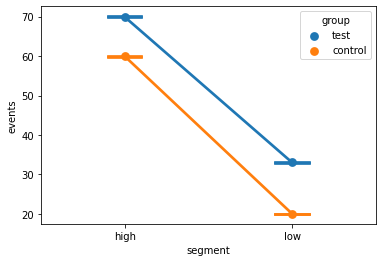

In [29]:
sns.pointplot(x='segment', y='events', hue='group', data=df2, capsize=.2)